<a href="https://colab.research.google.com/github/cij1012/python/blob/master/dnn_boston_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
print('train data shape:', train_data.shape)
test_data.shape

train data shape: (404, 13)


(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
#특성의 스케일이 다르면 전역 최소 점을 찾아가는 경사 하강법의 경로가 스케일이 큰 특성에 영향을 많이 받기 때문에 정규화가 필요함
#특성 중앙이 0근처에, 표준편차는 1로
mean = train_data.mean(axis=0)
#mean
train_data -= mean
print(train_data,'\n')
std = train_data.std(axis=0)
print(std,'\n')
#standard deviation
train_data /= std
print(train_data,'\n')
test_data -= mean
print(test_data,'\n')
test_data /= std
print(test_data,'\n')
#[1,2,3,4,....,13]을 행이아닌 열에 대한 mean값을 불러와야 하기 때문에

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]] 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202

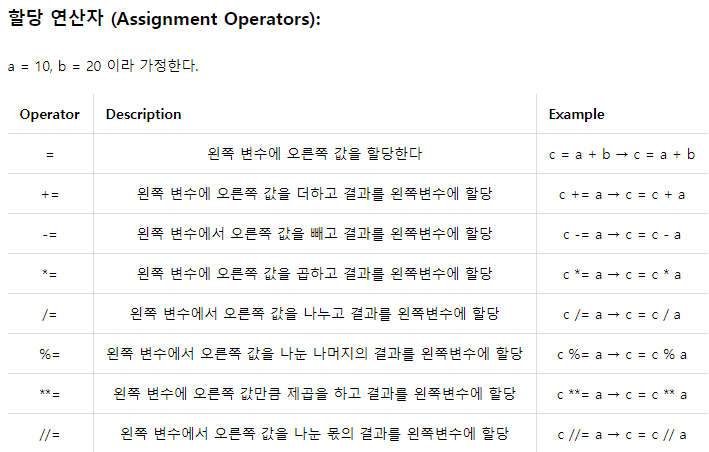

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='RMSProp', loss='mse', metrics=['mae'])
#모니터링을 위한 mae : 평균 절대 오차
#MAE = 0.5이면 평균적으로 500$의 차이가 발생

In [ ]:
history = model.fit(train_data, train_targets,
                 epochs=100,
                 batch_size=1,
                 validation_split=0.2)

Epoch 1/100
323/323 [==============================] - 1s 2ms/step - loss: 209.2990 - mae: 10.8195 - val_loss: 49.5109 - val_mae: 4.9342
Epoch 2/100
323/323 [==============================] - 1s 2ms/step - loss: 30.1932 - mae: 3.5586 - val_loss: 23.5912 - val_mae: 3.4639
Epoch 3/100
323/323 [==============================] - 1s 2ms/step - loss: 20.7568 - mae: 2.9344 - val_loss: 17.8696 - val_mae: 3.0015
Epoch 4/100
323/323 [==============================] - 1s 2ms/step - loss: 18.5885 - mae: 2.7509 - val_loss: 15.5744 - val_mae: 2.8915
Epoch 5/100
323/323 [==============================] - 1s 2ms/step - loss: 16.2088 - mae: 2.5720 - val_loss: 14.1860 - val_mae: 2.8302
Epoch 6/100
323/323 [==============================] - 1s 2ms/step - loss: 15.1756 - mae: 2.5094 - val_loss: 13.9114 - val_mae: 2.8142
Epoch 7/100
323/323 [==============================] - 1s 2ms/step - loss: 14.0250 - mae: 2.4087 - val_loss: 14.0846 - val_mae: 2.8086
Epoch 8/100
323/323 [==============================] 

In [ ]:
Y_prediction = model.predict(test_data).flatten()
#학습한 모델을 기반으로 test_data의 주택가격 예측
for i in range(100):
  label = test_targets[i]
  prediction = Y_prediction[i]
  print("실제가격 : {:.3f}, 예상가격 : {:.3f}".format(label, prediction))

실제가격 : 7.200, 예상가격 : 8.552
실제가격 : 18.800, 예상가격 : 17.595
실제가격 : 19.000, 예상가격 : 19.103
실제가격 : 27.000, 예상가격 : 34.055
실제가격 : 22.200, 예상가격 : 22.947
실제가격 : 24.500, 예상가격 : 21.965
실제가격 : 31.200, 예상가격 : 27.304
실제가격 : 22.900, 예상가격 : 20.462
실제가격 : 20.500, 예상가격 : 17.771
실제가격 : 23.200, 예상가격 : 18.171
실제가격 : 18.600, 예상가격 : 17.948
실제가격 : 14.500, 예상가격 : 16.338
실제가격 : 17.800, 예상가격 : 13.002
실제가격 : 50.000, 예상가격 : 41.511
실제가격 : 20.800, 예상가격 : 19.742
실제가격 : 24.300, 예상가격 : 20.248
실제가격 : 24.200, 예상가격 : 23.806
실제가격 : 19.800, 예상가격 : 20.567
실제가격 : 19.100, 예상가격 : 17.885
실제가격 : 22.700, 예상가격 : 33.653
실제가격 : 12.000, 예상가격 : 9.526
실제가격 : 10.200, 예상가격 : 11.102
실제가격 : 20.000, 예상가격 : 19.210
실제가격 : 18.500, 예상가격 : 14.427
실제가격 : 20.900, 예상가격 : 18.748
실제가격 : 23.000, 예상가격 : 19.690
실제가격 : 27.500, 예상가격 : 30.250
실제가격 : 30.100, 예상가격 : 25.861
실제가격 : 9.500, 예상가격 : 11.319
실제가격 : 22.000, 예상가격 : 18.737
실제가격 : 21.200, 예상가격 : 19.830
실제가격 : 14.100, 예상가격 : 16.023
실제가격 : 33.100, 예상가격 : 33.146
실제가격 : 23.400, 예상가격 : 22.064
실제가격 : 20.100, 예상가